### Get scale limit for a mobile re-captured image
1. Zoom in initial scale.
2. Crop image w/ current scale.
3. Execute FFT & calculate wave length of the cropped image.
4. Get pixel width in x-y axes.
5. Optimize scale to obtain 10-pixel width and 10-pixel height (iterate Step 2 to 4).

Reading image to align :  snipping\source.png


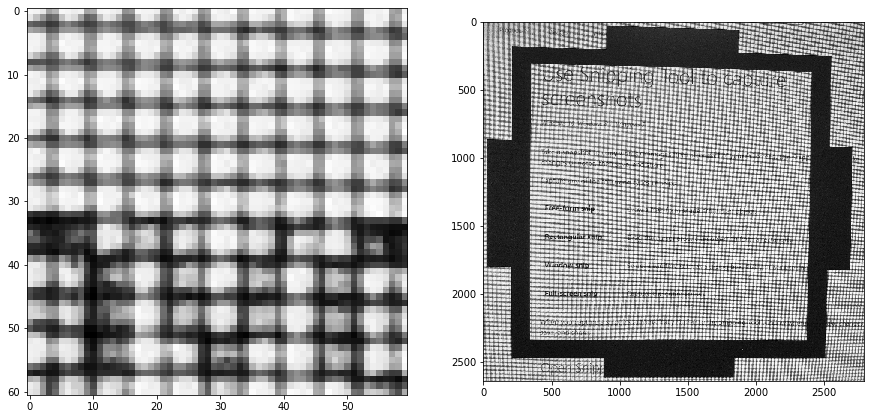

In [14]:
from pre_process import *
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import peak_local_max

dirName = "snipping"
imFilename = os.path.join(dirName, "source.png")

print("Reading image to align : ", imFilename);  
im = cv2.imread(imFilename, cv2.IMREAD_COLOR)

pim = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
height, width = pim.shape
n_pixel = 10
        
coordinates = np.array(peak_local_max(pim, min_distance=3))
M = np.ceil(np.sqrt(coordinates.shape[0]))
N = coordinates.shape[0]
    
d = np.ceil(np.sqrt(width*height/N))
    
nx, ny = tuple(np.array([width, height]) // int(d * n_pixel))

height, width = pim.shape

_, axes = plt.subplots(ncols=2, figsize=(15,15))
axes[0].imshow(pim[1000:1000+(height//ny), 1000:1000+(width//nx)], 'gray')
axes[1].imshow(pim, 'gray')
plt.show()